In [70]:
import MKE as dp
import numpy as np
import Graphics as gr

# Example 1

Solution of static problelem obtained from [1]. Problem's values were converted to metric units. The system was broken down to 4 beams and 5 supports. Supports are named "a", "b",... from left to right, beams are named "first", "second",.. from left to right. According to [1] the probelm was solved correctly.
<img src="files/677staticshibbeler.png" style="width: 500px;"/>

In [57]:
#In this cell we define all supports and beams included in the problem

a = dp.Support("a", 'fixed', 0, 0)
b = dp.Support("b", 'endpoint', 1.22, 0)
c = dp.Support("c", "joint", 2.44, 0)
d = dp.Support("d", "endpoint", 4.88, 0)
e = dp.Support("e", "roller", 6.12, 0)

first = dp.Beam('first', [a,], [b,],  0.006, 200e6, 0.01, 8000, 30, 0)
second = dp.Beam('second', [b,], [c,],  0.006, 200e6, 0.01, 8000, 30, 0)
third = dp.Beam('third', [c,], [d,],  0.006, 200e6, 0.01, 8000, 30, 0)
forth = dp.Beam('forth', [d,], [e,],  0.006, 200e6, 0.01, 8000, 30, 0)

In [58]:
forth.L

1.2400000000000002

In [59]:
#In this cell we define the matrices for solving main differential equations of individual beams

first.transformation_matrix()
first.form_elements()
first.form_M()
first.form_K()

second.transformation_matrix()
second.form_elements()
second.form_M()
second.form_K()

third.transformation_matrix()
third.form_elements()
third.form_M()
third.form_K()

forth.transformation_matrix()
forth.form_elements()
forth.form_M()
forth.form_K()

In [60]:
#In this cell we define point loads

b.set_boundryforces(0, 0, 0, -846, 2031, 0)
d.set_boundryforces(0, 0, 0, 445, 770, 0)
e.set_boundryforces(0, 0, 0, 0, 0, -5423)


In [61]:
#Assemble equations

M, b1, Naming, M_ = dp.form_mainMatrix((first, second, third, forth), 
                                       (a, b, c, d, e), dynamic=True)
            

In [62]:
#Perform calculčations

r = np.linalg.solve(M, b1)
R, Naming_new = dp.resoults_parsing((first, second, third, forth), 
                                       (a, b, c, d, e), r, Naming)

NF, eigenvectors = dp.natural_frequencies(M_, M)
NF = np.sort(NF)
NF[:5]

first.calculate_forces(R[0])
second.calculate_forces(R[1])
third.calculate_forces(R[2])
forth.calculate_forces(R[3])

In [67]:
beams = (first, second, third, forth)
supports = (a, b, c, d, e)

def info():
    print("===============================================")
    print('{0:10}  {1:10}'.format("L", "Loading"))
    print('{0:10}  {1:10}'.format("u", "Axial deformation"))
    print('{0:10}  {1:10}'.format("w", "Deflection"))
    print('{0:10}  {1:10}'.format("N", "Tension"))
    print('{0:10}  {1:10}'.format("T", "Shear"))
    print('{0:10}  {1:10}'.format("M", "Bending Moment"))
    print('{0:10}  {1:10}'.format("TAB", "Legend"))
    print('{0:10}  {1:10}'.format("ESC", "Quit graphical"))
    print("===============================================")

info()

def draw1():
    global draw
    draw = gr.Drawing()
    draw.scaling(beams)
    for beam_ in beams:
        draw.draw_beam(beam_)
    for sup_ in supports:
        draw.draw_support(sup_)

u_, w_, N_, T_, M_, q_, n_ = [], [], [], [], [], [], []

for beam in (first, second, third, forth):
    u_ = np.hstack((u_, beam.u))
    w_ = np.hstack((w_, beam.w))
    q_ = np.hstack((q_, np.array(beam.q_).flatten()))
    n_ = np.hstack((n_, np.array(beam.n_).flatten()))
    try:
        N_ = np.hstack((N_, beam.N))
        T_ = np.hstack((T_, beam.T))
        M_ = np.hstack((M_, beam.M))
    except:
        pass
u_ = np.hstack((u_, 0))
w_ = np.hstack((w_, 0))
n_ = np.hstack((n_, 0))
q_ = np.hstack((q_, 0))
N_ = np.hstack((N_, 0))
T_ = np.hstack((T_, 0))
M_ = np.hstack((M_, 0))

size_u = max(u_) - min(u_)
size_w = max(w_) - min(w_)
size_n = max(n_) - min(n_)
size_q = max(q_) - min(q_)
size_N = max(N_) - min(N_)
size_T = max(T_) - min(T_)
size_M = max(M_) - min(M_)

F_ = []
for sup in (supports):
    F_.append(np.sqrt(sup.Fx**2 + sup.Fy**2))
    F_.append(0)

size_F = max(F_) - min(F_)

draw1()
u, w, T, N, M, l, Legend = False, False, False, False, False, False, False
running = True
while running:
    for event in gr.pygame.event.get():
        if event.type == gr.pygame.QUIT or event.type == gr.pygame.KEYDOWN and event.key == gr.pygame.K_ESCAPE:
            running = False
            print("KONEC")
        if event.type == gr.pygame.KEYDOWN:
            if event.type == gr.pygame.KEYDOWN and event.key == gr.pygame.K_s:
                gr.pygame.image.save(draw.screen, "Structural_analysis.jpg")
            if event.type == gr.pygame.KEYDOWN and event.key == gr.pygame.K_u:
                u = ~u

            if event.type == gr.pygame.KEYDOWN and event.key == gr.pygame.K_l:
                l = ~l

            if event.type == gr.pygame.KEYDOWN and event.key == gr.pygame.K_w:
                w = ~w

            if event.type == gr.pygame.KEYDOWN and event.key == gr.pygame.K_t:
                T = ~T

            if event.type == gr.pygame.KEYDOWN and event.key == gr.pygame.K_n:
                N = ~N

            if event.type == gr.pygame.KEYDOWN and event.key == gr.pygame.K_m:
                M = ~M
            if event.type == gr.pygame.KEYDOWN and event.key == gr.pygame.K_TAB:
                Legend = ~Legend

            draw1()

            if l:
                for beam in beams:
                    if size_q:
                        size = (max(np.hstack((beam.q_, 0))) - min(np.hstack((beam.q_, 0)))) / size_q * 100
                        draw.draw_loading(beam.q_, beam, 1, draw.RED, draw_size=size)
                    if size_n:
                        size = (max(beam.n_) - min(beam.n_)) / size_n * 100
                        draw.draw_loading(beam.n_, beam, -1, draw.BLACK, draw_size=size)

                for sup in supports:
                    print(size_F)
                    if size_F:
                        size = (sup.Fx**2 + sup.Fy**2)/size_F**2
                    else:
                        size = 0
                    draw.draw_boundryloading(sup, size*100, 20)

            if u:
                for beam in beams:
                    size = (max(np.hstack((beam.u, 0))) - min(np.hstack((beam.u, 0))))/size_u * 100
                    draw.draw_loading(beam.u, beam, 1, draw.BLUE, draw_size = size)
            if w:
                for beam in beams:
                    size = (max(np.hstack((beam.w, 0))) - min(np.hstack((beam.w, 0))))/size_w * 100
                    draw.draw_loading(beam.w, beam, -1, draw.GREEN, draw_size = size)
            if N:
                for beam in beams:
                    size = (max(np.hstack((beam.N, 0))) - min(np.hstack((beam.N, 0))))/size_N * 100
                    draw.draw_loading(beam.N, beam, 1, draw.DARKOLIVEGREEN, draw_size = size)
            if T:
                for beam in beams:
                    size = (max(np.hstack((beam.T, 0))) - min(np.hstack((beam.T, 0))))/size_T * 100
                    draw.draw_loading(beam.T, beam, -1, draw.LBLUE, draw_size = size)
            if M:
                for beam in beams:
                    size = (max(np.hstack((beam.M, 0))) - min(np.hstack((beam.M, 0))))/size_M * 100
                    draw.draw_loading(beam.M, beam, 1, draw.PURPLE, draw_size = size)
            if Legend:
                draw.legend()
        gr.pygame.display.update()

L           Loading   
u           Axial deformation
w           Deflection
N           Tension   
T           Shear     
M           Bending Moment
TAB         Legend    
ESC         Quit graphical
1
1
1.41421356237
50
300
200
335
235
0
0
1
1
1.41421356237
50
300
200
335
235
0
0
1
1
1.41421356237
50
300
200
335
235
0
0
KONEC


In [55]:
NF[:5]

array([  39.45152827,   40.58293788,  120.12577211,  121.75596774,
        202.96314971])

In [40]:
R

[array([ 0.,  0.,  0.]),
 array([ 0.,  0.,  0.]),
 array([ 0.,  0.,  0.]),
 array([ 0.,  0.,  0.])]

In [21]:
#In this cell we define transformation matrices used for transforming variables from local coordinate systems of individual beam to global coordinate system

first.transformation_matrix()
second.transformation_matrix()
third.transformation_matrix()
forth.transformation_matrix()

In [22]:
#in this cell we define all boundry equations hat may be needed for individual beam and support

first.set_boundry_1()
first.set_boundry_2()
second.set_boundry_1()
second.set_boundry_2()
third.set_boundry_1()
third.set_boundry_2()
forth.set_boundry_1()
forth.set_boundry_2()

first.set_boundry_M(first.B_1, a, 1)
first.set_boundry_M(first.B_2, b, 2)

second.set_boundry_M(second.B_1, b, 1)
second.set_boundry_M(second.B_2, c, 2)

third.set_boundry_M(third.B_1, c, 1)
third.set_boundry_M(third.B_2, d, 2)

forth.set_boundry_M(forth.B_1, d, 1)
forth.set_boundry_M(forth.B_2, e, 2)

AttributeError: 'Beam' object has no attribute 'set_boundry_1'

In [9]:
#In this cell we form final beam matrices

first.form_M([a,], [b,])
second.form_M([b,], [c,])
third.form_M([c,], [d,])
forth.form_M([d,], [e,])

In [10]:
#In this cell we define loading conditions, either forces or moments on supports or continual loading on beams

first.set_loading(0, 0)
second.set_loading(0, 0)
third.set_loading(0, 0)
forth.set_loading(0, 0)

a.set_boundryforces(0, 0, 0, 0, 0, 0)
b.set_boundryforces(0, 0, 0, -846, 2031, 0)
c.set_boundryforces(0, 0, 0, 0, 0, 0)
d.set_boundryforces(0, 0, 0, 445, 770, 0)
e.set_boundryforces(0, 0, 0, 0, 0, -5423)

In [11]:
#In this cell we form boundry matrices for individual beams

first.form_b([a,],  [b,])
second.form_b([b,],  [c,])
third.form_b([c,],  [d,])
forth.form_b([d,],  [e,])

[0 0 0 0 0 0]
[   0    0 -846 2031    0    0]
[   0    0 -846 2031    0    0]
[0 0 0 0 0 0]
[0 0 0 0 0 0]
[  0   0 445 770   0   0]
[  0   0 445 770   0   0]
[    0     0     0     0 -5423     0]


In [14]:
#Forms final matric and vector for calculation, Naming is vector containing information abount individual equation in M
M, b1, Naming = dp.main_matrix_formation((first, second, third, forth), (a, b, c, d, e))


[{<Structural_analysis.Support object at 0x000001DB2D809FD0>}, {<Structural_analysis.Support object at 0x000001DB2D809F98>}, {<Structural_analysis.Support object at 0x000001DB2D8130B8>}, {<Structural_analysis.Support object at 0x000001DB2D8130F0>}, {<Structural_analysis.Support object at 0x000001DB2D813128>}]
asdasdasd
b
Fx
u
s
sasdasd
[3, 209]
[5, 211]
Fy
w
s
sasdasd
[4, 208]
[5, 210]
M
fi
s
sasdasd
[6, 210]
[5, 209]
asdasdasd
c
Fx
u
s
sasdasd
[209, 415]
[211, 417]
Fy
w
s
sasdasd
[210, 414]
[211, 416]
fi
asdasdasd
d
Fx
u
s
sasdasd
[415, 621]
[417, 623]
Fy
w
s
sasdasd
[416, 620]
[417, 622]
M
fi
s
sasdasd
[418, 622]
[417, 621]
u
[621]
[['first' '1' 'a' 'u']
 ['first' '1' 'a' 'w']
 ['first' '1' 'a' 'fi']
 ..., 
 ['forth' None None 197]
 ['forth' None None 198]
 ['forth' None None 199]]


In [15]:
#Solving the problem
r = np.linalg.solve(M, b1)

In [16]:
#Resoult parsing and calculating internal forces
dp.resoult_parsing(r, first, second, third, forth)

first.calculate_NTM()
second.calculate_NTM()
third.calculate_NTM()
forth.calculate_NTM()

## Plots for individual beam

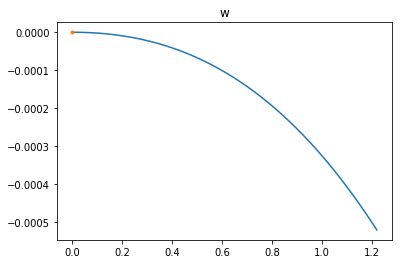

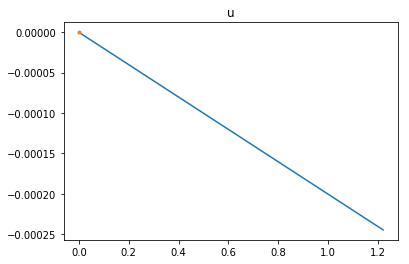

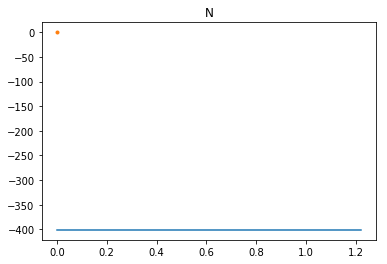

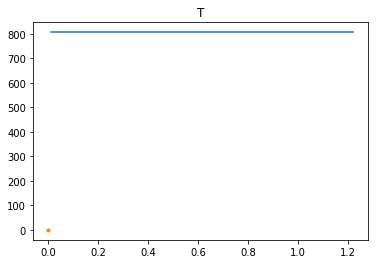

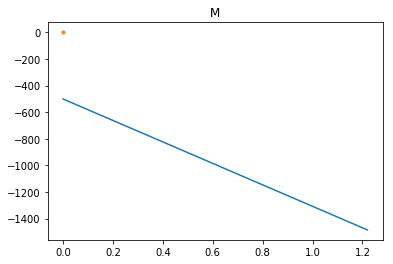

In [17]:
first.drawing()

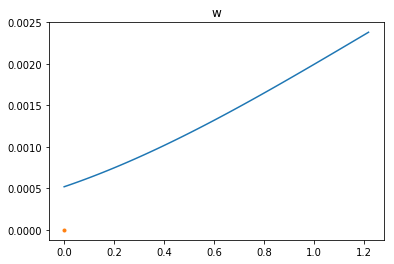

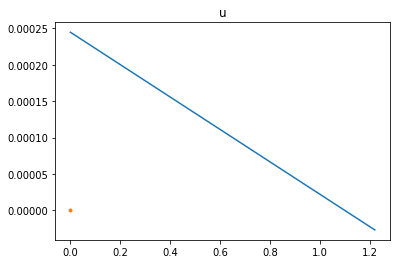

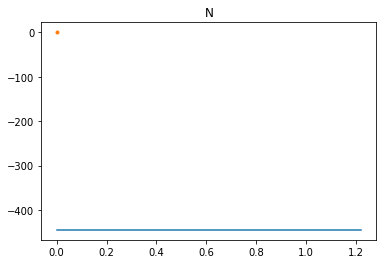

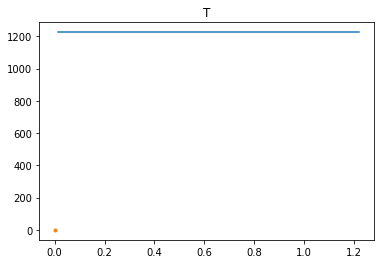

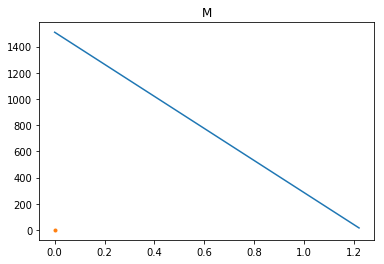

In [13]:
second.drawing()

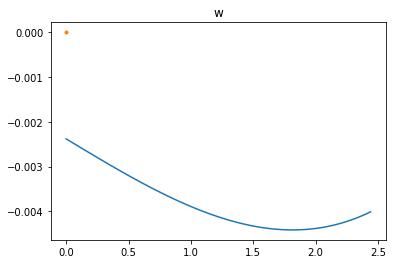

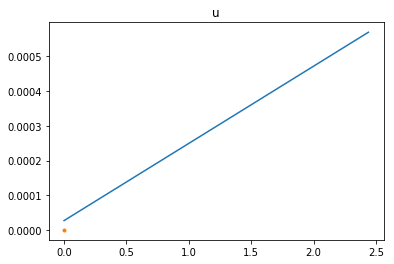

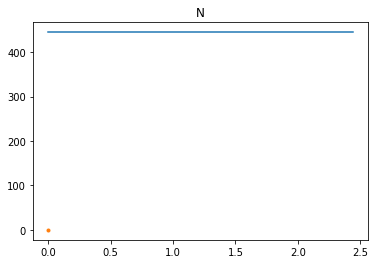

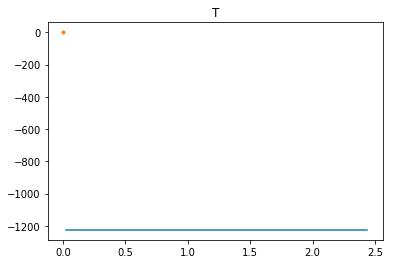

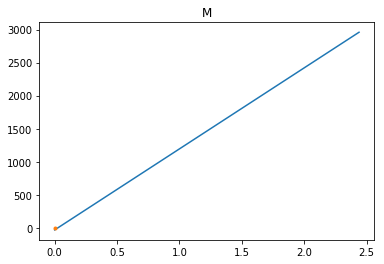

In [14]:
third.drawing()

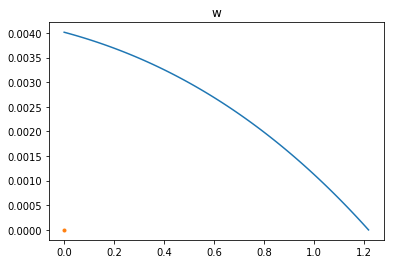

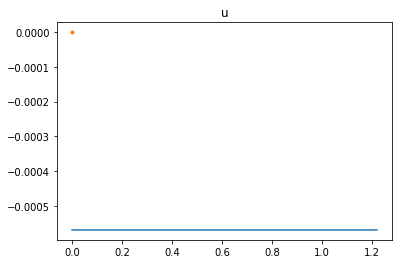

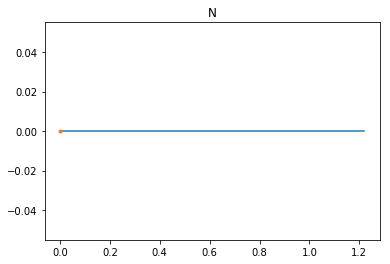

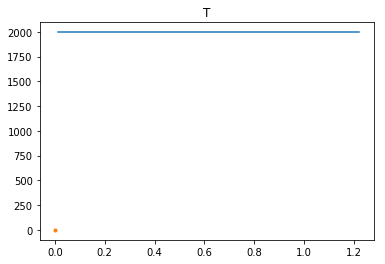

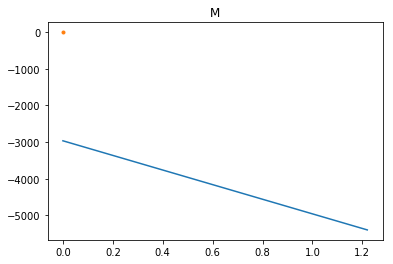

In [15]:
forth.drawing()

In [16]:
DRAW = dp.Drawing()

In [17]:
first.supports_2[0].X

1.22

In [18]:
DRAW.draw_beam(first)
DRAW.draw_beam(second)
DRAW.draw_beam(third)
DRAW.draw_beam(forth)


DRAW.draw_support(a)
DRAW.draw_support(b)
DRAW.draw_support(c)
DRAW.draw_support(d)
DRAW.draw_support(e)


fixed
endpoint
joint
endpoint
roller


### References:
[1] Hibbeler, R. C., Statics, 12th edition, page 313